In [47]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
!pip install bs4

    100% |████████████████████████████████| 102kB 77kB/s a 0:00:01
  Stored in directory: /Users/danybol/Library/Caches/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
np.random.seed(12345)



from bs4 import BeautifulSoup

str(2).zfill(2)

data = []
for i in range(1, 16):
    with open('../reuters/reut2-0{}.sgm'.format(str(i).zfill(2), 'r')) as f:
        print(i)
        bs = BeautifulSoup(f, from_encoding='latin1')
        for ret in bs.find_all('reuters'):
            places = [p.text for p in ret.find('places').find_all('d')]
            for p in places:
                data.append({'is_uk': 'uk' in places, 'text': ret.find('text').text})
                
data = pd.DataFrame(data)
data.text = data.text.str.lower().str.replace("[^A-Za-z ]+", "").str.replace("\s+", " ")
data['is_uk'] = data.is_uk.astype(int)
uk_data = data[data.is_uk==1]
non_uk_data = data[data.is_uk == 0].head(uk_data.shape[0])
data = pd.concat([uk_data, non_uk_data]).reset_index(drop=True)
data = data.loc[np.random.choice(data.index, size=data.shape[0])].reset_index(drop=True)
data.head(500).to_csv("./uk.csv", index=False)

data = []
for i in range(1, 16):
    with open('../reuters/reut2-0{}.sgm'.format(str(i).zfill(2), 'r')) as f:
        print(i)
        bs = BeautifulSoup(f, from_encoding='latin1')
        for ret in bs.find_all('reuters'):
            places = [p.text for p in ret.find('topics').find_all('d')]
            for p in places:
                data.append({'is_earn': 'earn' in places, 'text': ret.find('text').text})
                
data = pd.DataFrame(data)
data['is_earn'] = data.is_earn.astype(int)
data['text'] = data.text.str.replace("\n", "")
data['text'] = data.text.str.lower().str.replace("[^A-Za-z ]+", "").str.replace("\s+", " ")
uk_data = data[data.is_earn==1]
non_uk_data = data[data.is_earn == 0].head(uk_data.shape[0])
data = pd.concat([uk_data, non_uk_data]).reset_index(drop=True)
data = data.loc[np.random.choice(data.index, size=data.shape[0])].reset_index(drop=True)

data.head(500).to_csv("earnings.csv", index=False)



FileNotFoundError: [Errno 2] No such file or directory: '../reuters/reut2-001.sgm'

In [8]:
X, y= make_classification(n_samples=500)

In [63]:
from sklearn.datasets import make_moons, make_circles

In [153]:
X, y= make_moons(n_samples=5000, noise=0.3)
X2, y2 = make_moons(n_samples=5000, noise=0.5)
X = np.vstack((X, X2-0.5))
y = np.hstack((y, y2))

In [154]:
y[X[:, 0] < -2] = 1
y[X[:, 0] > 2] = 0

In [211]:
X[:, 0] = np.linspace(-10, 10, num=X.shape[0])


In [450]:
X = np.random.randn(2000, 2)
X[:, 0] = np.linspace(-10, 10, num=X.shape[0])
xy = X[:, 0] ** 3 - 0.1*X[:, 0]**5 - X[:, 0] + X[:, 1]**2


y = (5*X[:, 1] > xy).astype(int)
X[:,0] += 1*np.random.randn(X.shape[0])
X[:,1] += 1*np.random.randn(X.shape[0])


In [451]:
y.mean()

0.509

In [452]:
to_flip = np.random.choice([False, True], size=X.shape[0], p=[0.9, 0.1])

In [453]:
(to_flip & (y==0)).mean()

0.0635

In [454]:
set_one = to_flip & (y==0)
set_zero = to_flip & (y==1)

y[set_one] = 1
y[set_zero] = 0

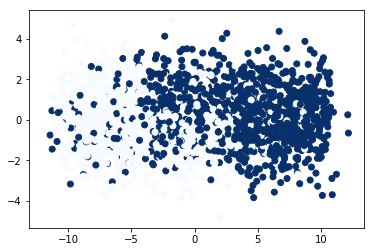

In [455]:
scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Blues)

In [456]:
#X = np.hstack((X, np.random.randn(X.shape[0], 1)))

In [457]:
X.shape

(2000, 2)

In [458]:
data = pd.DataFrame(X)
data['y'] = y

In [459]:
data.y.value_counts()

1    1048
0     952
Name: y, dtype: int64

In [460]:
data = data.loc[np.random.choice(data.index, size=data.index.shape[0], replace=False)].copy()

In [461]:
data.to_csv("./classification.csv", index=False)